In [1]:
import json
import os
import datetime

# add datascience libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")
results_dir = '../results'

In [3]:
with open(os.path.join(results_dir, 'result.json')) as f:
  # load the data
  data = json.loads(f.read())
  client_side_data = data["lineitem"]["client"]
    
  # prepare the numpy array
  numpy_array_client_side = []
  for key, value in client_side_data.items():
    points = value.split(",")
    for point in points:
      numpy_array_client_side.append([key, point])

# convert to dataframes
df_client_side = pd.DataFrame(np.array(numpy_array_client_side), columns=['selectivity', 'duration'])
df_client_side[['duration']] = df_client_side[['duration']].apply(pd.to_numeric)

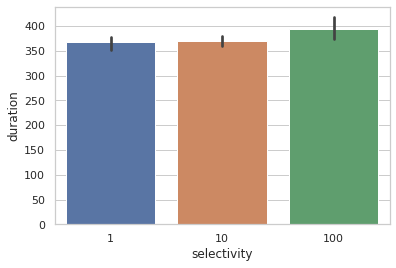

In [4]:
# plot for client side
ax = sns.barplot(x="selectivity", y="duration", data=df_client_side)
ax.figure.savefig(os.path.join(results_dir, "client_side.png"), dpi=200)
ax.figure.show()

In [5]:
with open(os.path.join(results_dir, 'result.json')) as f:
  # load the data
  data = json.loads(f.read())
  storage_side_data = data["lineitem"]["storage"]
    
  # prepare the numpy array
  numpy_array_storage_side = []
  for key, value in storage_side_data.items():
    points = value.split(",")
    for point in points:
      numpy_array_storage_side.append([key, point])

# convert to dataframes
df_storage_side = pd.DataFrame(np.array(numpy_array_storage_side), columns=['selectivity', 'duration'])
df_storage_side[['duration']] = df_storage_side[['duration']].apply(pd.to_numeric)

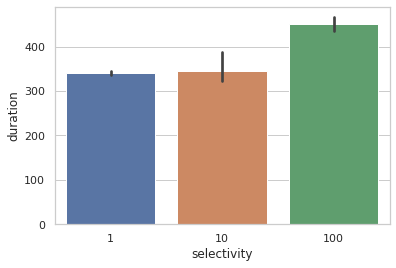

In [6]:
# plot for storage side
ax = sns.barplot(x="selectivity", y="duration", data=df_storage_side)
ax.figure.savefig(os.path.join(results_dir, "storage_side.png"), dpi=200)
ax.figure.show()